In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
palette=sns.color_palette("rocket")


from pcoptim import LeastSquares
from pcoptim import coordinate_descent, gradient_descent, greedy_coordinate_descent
from pydaha.datasets.normal import make_regression
from pydaha.optimals import optimal_objective

In [2]:
p = 2

w0 = [0] * p

w = [0] * p
w[0] = 100
w[1] = -10

X, y, _ = make_regression(1000, p, w, seed=42)

In [3]:
loss = LeastSquares(X, y)
coef, opt = optimal_objective(X, y, "ls", "none", "none")

w0[1] = coef[1]

In [4]:
epsilon, delta =1, 1e-6
clip = 200
T=10
Tn=7

ret = coordinate_descent(loss, w0, max_iter=Tn, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params = np.array(ret.params_)

ret2 = gradient_descent(loss, w0, max_iter=Tn, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params2 = np.array(ret2.params_)

ret3 = greedy_coordinate_descent(loss, w0, max_iter=Tn, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params3 = np.array(ret3.params_)


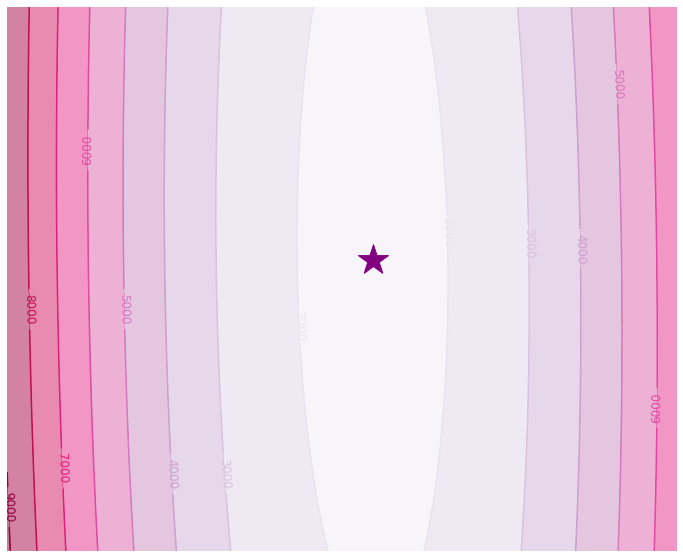

In [5]:

npoints=100
xlist = np.linspace(-20.0, 200.0, npoints)
ylist = np.linspace(-30.0, 5.0, npoints)
xx, yy = np.meshgrid(xlist, ylist)

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

plt.axis("off")

plt.savefig("example_none.pdf", bbox_inches="tight")

plt.show()

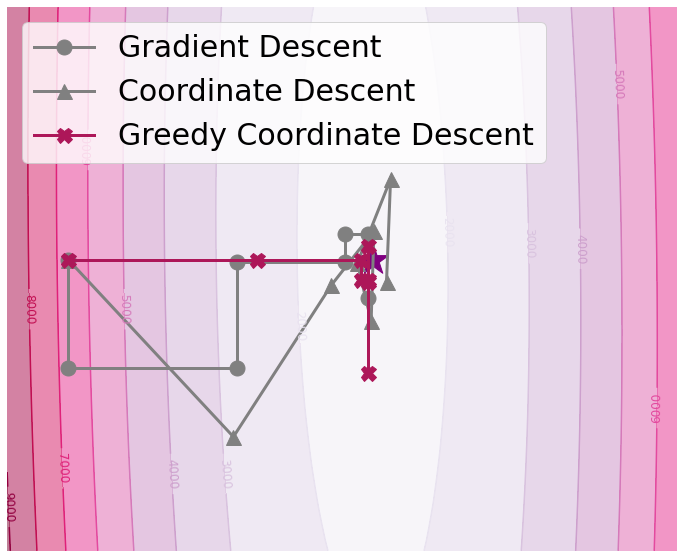

In [6]:
## npoints=100

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([params, params2, params3]):
    if i < 2:
        hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color="grey")
    else:
        hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Gradient Descent", "Coordinate Descent",  "Greedy Coordinate Descent"], 
           fontsize=30, loc="upper left")
plt.axis("off")

plt.savefig("example_3.pdf", bbox_inches="tight")

plt.show()

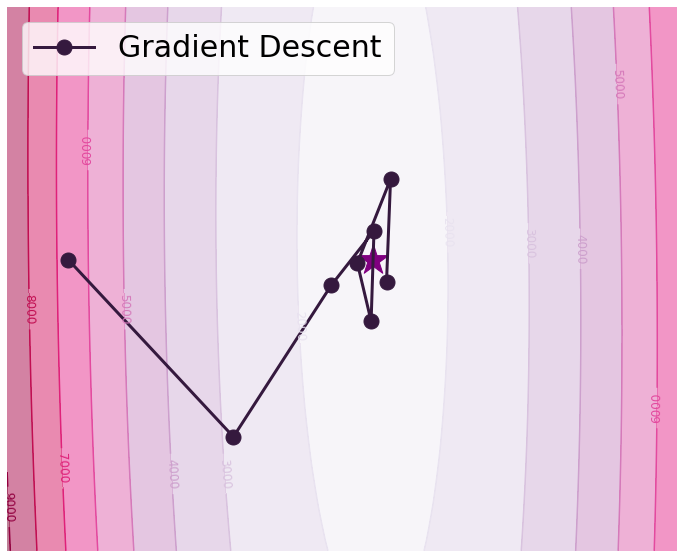

In [7]:

npoints=100

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([params2]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Gradient Descent", "Coordinate Descent",  "Greedy Coordinate Descent"], 
           fontsize=30, loc="upper left")
plt.axis("off")
plt.savefig("example_1.pdf", bbox_inches="tight")
plt.show()

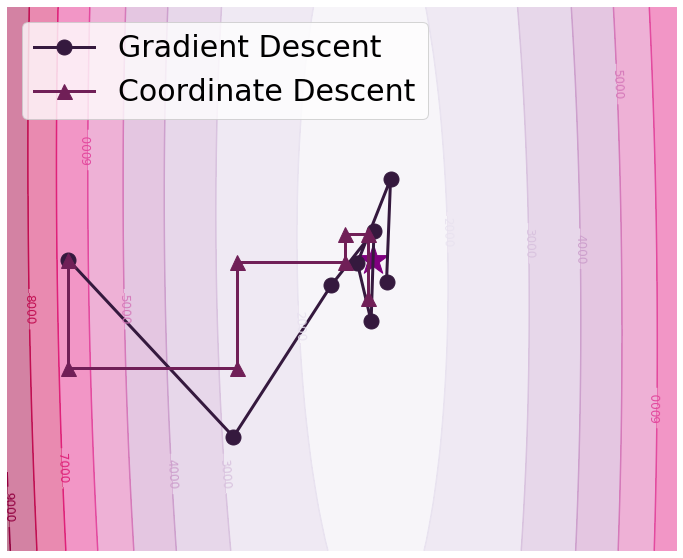

In [8]:

npoints=100

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([params2, params]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Gradient Descent", "Coordinate Descent",  "Greedy Coordinate Descent"], 
           fontsize=30, loc="upper left")
plt.axis("off")
plt.savefig("example_2.pdf", bbox_inches="tight")
plt.show()

In [9]:
from matplotlib import rcParams
rcParams['hatch.linewidth'] = 1.

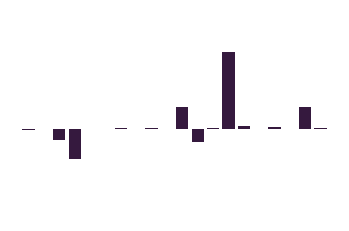

In [10]:
rng = np.random.default_rng(seed=42)
grad = rng.lognormal(sigma=5,size=20)
grad *= np.array([1 if rng.random() < 0.75 else -1 for i in range(20)])
grad
plt.bar(np.arange(20), grad, color=palette[0])
plt.ylim(-350, 450)

plt.axis("off")
plt.savefig("grad_example_1.pdf", bbox_inches="tight")

[-215.1772873     8.5999059    99.40099809   20.47601349  115.88340337
  390.8332732  -198.40497367  126.84851053 -223.53552854   46.11817506
  -68.75153812  177.60090078 -115.41869955   69.69732641 -169.73684122
 -289.67889613   58.32567986  232.54516464   69.78331985 -134.45465037]


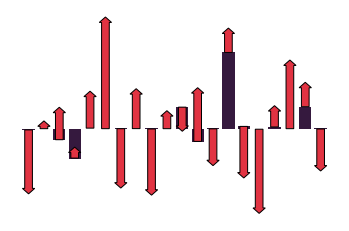

In [11]:
rng = np.random.default_rng(seed=1234)
noise = rng.normal(scale=30*np.sqrt(20), size=20)
print(noise)

#plt.bar(np.arange(20), grad+noise, color=palette[2], hatch="/")

plt.bar(np.arange(20), grad, color=palette[0])
plt.ylim(-350, 450)
plt.axis("off")


for i in range(20):
    if noise[i] * grad[i] < 0:
        offset = grad[i] - 2 * np.sign(grad[i])
    else:
        offset = grad[i]
    
    plt.arrow(i, offset, 0, noise[i], 
              head_width=0.8, head_length=20, width=0.5, 
              facecolor=palette[3], 
              edgecolor="black")
    
plt.savefig("grad_example_2.pdf", bbox_inches="tight")

[-215.1772873     8.5999059    99.40099809   20.47601349  115.88340337
  390.8332732  -198.40497367  126.84851053 -223.53552854   46.11817506
  -68.75153812  177.60090078 -115.41869955   69.69732641 -169.73684122
 -289.67889613   58.32567986  232.54516464   69.78331985 -134.45465037]


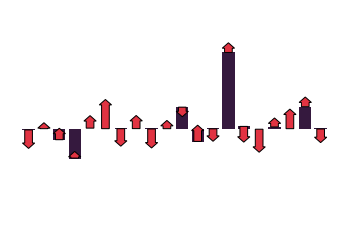

In [12]:
rng = np.random.default_rng(seed=1234)
noise_small = rng.normal(scale=30, size=20)
print(noise)

#plt.bar(np.arange(20), grad+noise, color=palette[2], hatch="/")

plt.bar(np.arange(20), grad, color=palette[0])
plt.ylim(-350, 450)
plt.axis("off")


for i in range(20):
    if noise[i] * grad[i] < 0:
        offset = grad[i] - 2 * np.sign(grad[i])
    else:
        offset = grad[i]
    
    plt.arrow(i, offset, 0, noise_small[i], 
              head_width=0.8, head_length=20, width=0.5, 
              facecolor=palette[3], 
              edgecolor="black")
    
plt.savefig("grad_example_noisy_1.pdf", bbox_inches="tight")

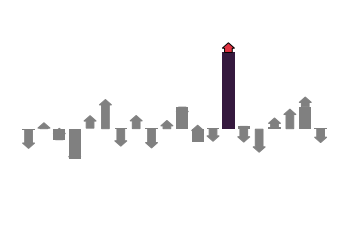

In [13]:

#noise[13] = rng.normal(scale=40, size=1)
plt.bar(np.arange(20), grad, color="grey")
plt.bar([13], grad[13], color=palette[0])
#plt.bar(np.arange(20), noise, bottom=grad, color=palette[3], hatch="/")
plt.ylim(-350, 450)

plt.axis("off")


for i in range(20):
    if noise[i] * grad[i] < 0:
        offset = grad[i] - 2 * np.sign(grad[i])
    else:
        offset = grad[i]
    
    if i != 13:
        plt.arrow(i, offset, 0, noise_small[i], 
                  head_width=0.8, head_length=20, width=0.5, 
                  facecolor="grey", 
                  edgecolor="grey")
    
for i in [13]:
    if noise[i] < 0:
        offset = grad[i] - 2
    else:
        offset = grad[i]
    
    plt.arrow(i, offset, 0, noise_small[i], 
              head_width=0.8, head_length=20, width=0.5, 
              facecolor=palette[3], 
              edgecolor="black")
    

plt.savefig("grad_example_3.pdf", bbox_inches="tight")

In [14]:
epsilon, delta =0, 1e-6
clip = 200

retnopriv = coordinate_descent(loss, w0, max_iter=T, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
paramsnopriv = np.array(retnopriv.params_)

ret2nopriv = gradient_descent(loss, w0, max_iter=T, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params2nopriv = np.array(ret2nopriv.params_)

ret3nopriv = greedy_coordinate_descent(loss, w0, max_iter=T, epochs=False, nb_logs=1000, learning_rate=1,
                         epsilon=epsilon, delta=delta, clip=clip)
params3nopriv = np.array(ret3nopriv.params_)


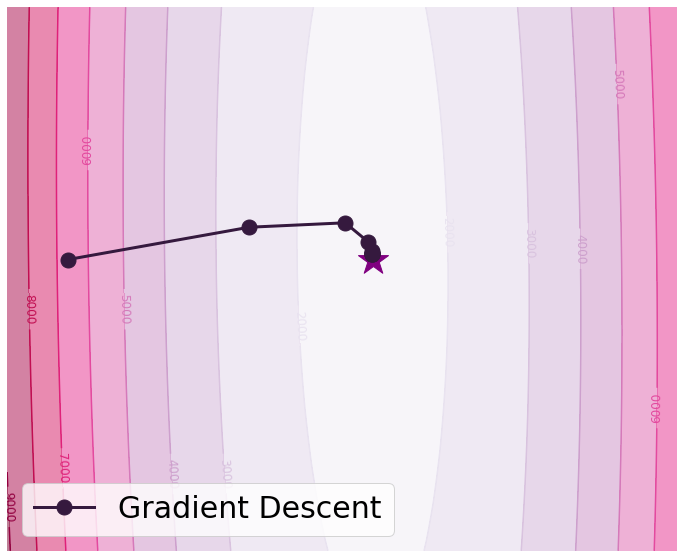

In [15]:

npoints=100

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([params2nopriv]):#, params2nopriv, params3nopriv]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Gradient Descent", "Coordinate Descent",  "Greedy Coordinate Descent"], 
           fontsize=30, loc="lower left")
plt.axis("off")

plt.savefig("example_1_nopriv.pdf", bbox_inches="tight")

plt.show()

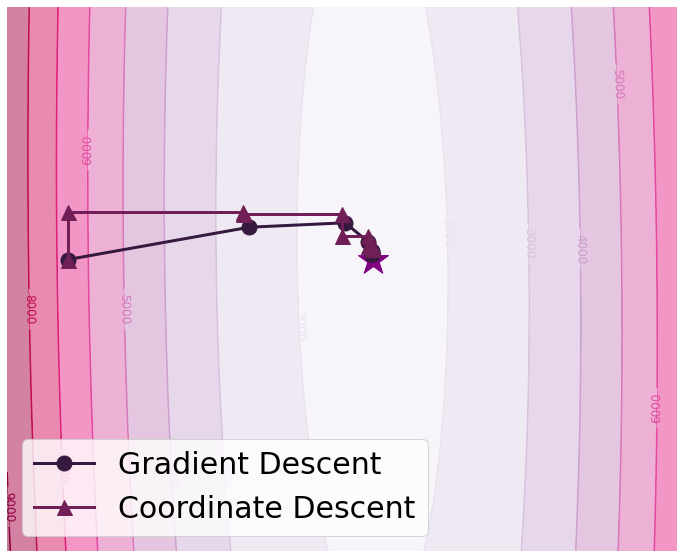

In [16]:

npoints=100

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([params2nopriv, paramsnopriv]):#, params3nopriv]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Gradient Descent", "Coordinate Descent",  "Greedy Coordinate Descent"], 
           fontsize=30, loc="lower left")
plt.axis("off")

plt.savefig("example_2_nopriv.pdf", bbox_inches="tight")

plt.show()

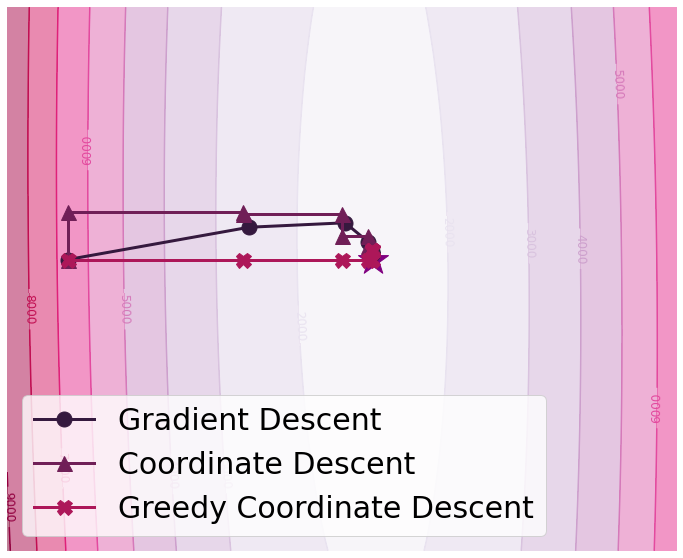

In [17]:

npoints=100

zz = np.array([[loss.evaluate([xx[i,j], yy[i,j]]) for j in range(npoints)] for i in range(npoints)])
fig,ax=plt.subplots(1,1,figsize=(12,10))

ax.contourf(xx, yy, zz, alpha=0.5, cmap="PuRd")
contours = plt.contour(xx, yy, zz, cmap="PuRd")

plt.clabel(contours, inline=1, fontsize=12)

plt.scatter(coef[0], coef[1], marker="*", s=1000, color="purple")

hdls = []
markers = ["o", "^", "X"]
for i, p in enumerate([params2nopriv, paramsnopriv, params3nopriv]):
    hdl, = plt.plot(p[:,0], p[:,1], lw=3, marker=markers[i], markersize=15, color=palette[i])
    hdls.append(hdl)
    
plt.legend(hdls, ["Gradient Descent", "Coordinate Descent",  "Greedy Coordinate Descent"], 
           fontsize=30, loc="lower left")
plt.axis("off")

plt.savefig("example_3_nopriv.pdf", bbox_inches="tight")

plt.show()

In [18]:
from pydaha.datasets.fetch_dataset import fetch_indep_lognormal_opt

In [19]:
import pandas as pd

def import_dataset(name, data_dir, norm=None):

    path = data_dir + name + "/" + name

    def load_csv(path):
        df = pd.read_csv(path)
        return np.array(df.loc[:,df.columns != "target"]), np.array(df["target"])

    return load_csv(path + "_" + norm + ".csv")



In [20]:
data_dir = "~/research/datasets/"
name = "lognormal_opt_1"

In [21]:
X, y = import_dataset(name, data_dir, norm="norm")

In [22]:
from pydaha.optimals import optimal_objective

w, _ = optimal_objective(X, y, "log", "l2", 1e-3)

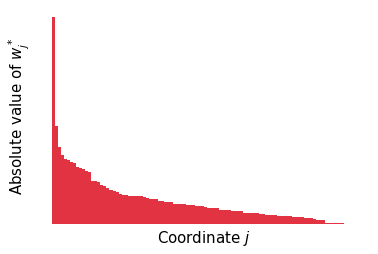

In [23]:
w = np.sort(np.abs(w))[::-1]


fig, ax = plt.subplots()
plt.bar(np.arange(100), w, color=palette[3], width=1.05)
#plt.axis("off")


ax.set_yticklabels([])
ax.set_xticklabels([])

ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.ylabel("Absolute value of $w_j^*$", fontsize=15)
plt.xlabel("Coordinate $j$", fontsize=15)
plt.savefig("lognormal_solution.pdf", bbox_inches="tight")